# Neural Network
---

![fig1](./figs/NN_1.jpg)

$$
a = b + w_1x_1 + w_2x_2\\
y = h(a)
$$

## 활성화 함수

* 비선형 함수를 써야함

### 계단함수

In [1]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

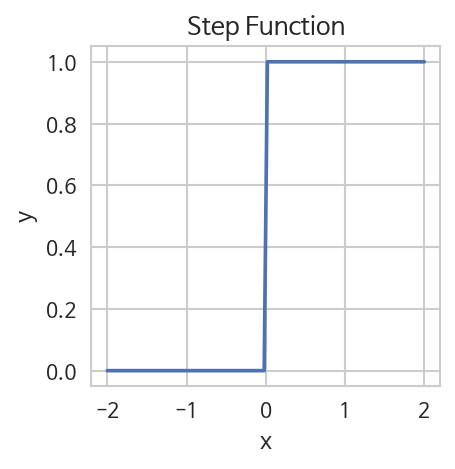

In [5]:
xx = np.linspace(-2, 2, 100)
yy = step_function(xx)
plt.figure(figsize=(3, 3), dpi=150)
plt.title("Step Function")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(xx, yy)
plt.show()

### 시그모이드 함수

$$h(x) = \frac{1}{1+exp(-x)}$$

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

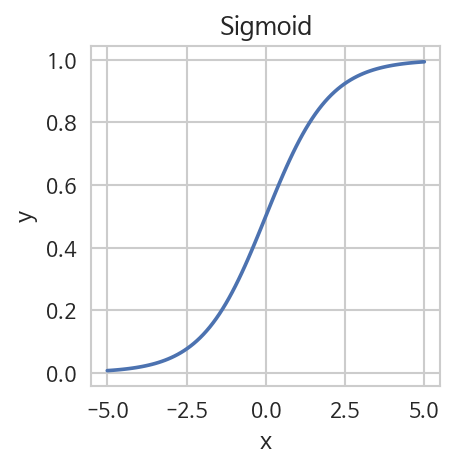

In [8]:
xx = np.linspace(-5, 5, 100)
yy = sigmoid(xx)
plt.figure(figsize=(3, 3), dpi=150)
plt.title("Sigmoid")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(xx, yy)
plt.show()

### ReLu 함수

$$
h(x) = 
\begin{cases}
  x\ \ (x > 0) \\
  0\ \ (x \leq 0) \\ 
\end{cases}
$$

In [9]:
def ReLu(x):
    return np.maximum(0, x)

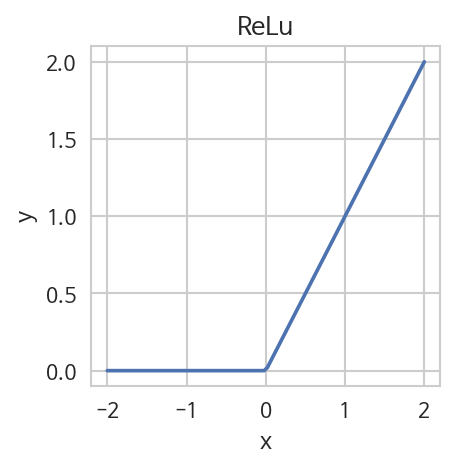

In [12]:
xx = np.linspace(-2, 2, 100)
yy = ReLu(xx)
plt.figure(figsize=(3, 3), dpi=150)
plt.title("ReLu")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(xx, yy)
plt.show()

## FeedForward

![fig2](./figs/NN_2.jpg)

In [23]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.2],
               [0.3, 0.4],
               [0.5, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print('X:', X.shape)
print('W1:', W1.shape)
print('B1:', B1.shape)
# Input -> Hidden 1
print('=================')
print('Input -> Hidden1')
print('=================')
# linear sum
A1 = np.dot(W1, X) + B1
print('A1:', A1.shape)
print(A1)
# activation
Z1 = sigmoid(A1)
print('Z1:', Z1.shape)
print(Z1)

X: (2,)
W1: (3, 2)
B1: (3,)
Input -> Hidden1
A1: (3,)
[ 0.3  0.7  1.1]
Z1: (3,)
[ 0.57444252  0.66818777  0.75026011]


In [24]:
W2 = np.array([[0.1, 0.2, 0.3],
               [0.4, 0.5, 0.6]])
B2 = np.array([0.1, 0.2])

print('Z1:', Z1.shape)
print('W2:', W2.shape)
print('B2:', B2.shape)
# Hidden 1 -> Hidden 2
print('=================')
print('Hidden 1 -> Hidden 2')
print('=================')
# linear sum
A2 = np.dot(W2, Z1) + B2
print('A2:', A2.shape)
print(A2)
# activation
Z2 = sigmoid(A2)
print('Z2:', Z2.shape)
print(Z2)

Z1: (3,)
W2: (2, 3)
B2: (2,)
Hidden 1 -> Hidden 2
A2: (2,)
[ 0.51615984  1.21402696]
Z2: (2,)
[ 0.62624937  0.7710107 ]


In [25]:
def identity_function(x):
    return x

In [28]:
W3 = np.array([[0.1, 0.2],
               [0.3, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(W3, Z2) + B3
Y = identity_function(A3)
print(Y)

[ 0.31682708  0.69627909]


### Softmax

$$y_k = \frac{exp(a_k)}{\sum_{i=1}^{n}{exp(a_i)}}$$

In [1]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

overflow 문제 있음, 지수함수는 엄청난 큰 수를 출력하기 때문에 컴퓨터로 계산시 문제 발생함

$$
y_k = \frac{exp(a_k)}{\sum_{i=1}^{n}{exp(a_i)}} 
\\ = \frac{Cexp(a_k)}{C\sum_{i=1}^{n}{exp(a_i)}} 
\\ = \frac{exp(a_k+\log{C})}{\sum_{i=1}^{n}{exp(a_i+\log{C})}} 
\\ = \frac{exp(a_k+C^{'})}{\sum_{i=1}^{n}{exp(a_i+C^{'})}} 
$$

이것을 막을 목적으로 입력 신호 중 최대값을 이용하는 것이 일반적

In [3]:
a = np.array([1010, 1000, 990])
softmax(a)

/Users/Soo/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app
/Users/Soo/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


array([ nan,  nan,  nan])

In [4]:
c = np.max(a)
print(a - c)
print(softmax(a-c))

[  0 -10 -20]
[  9.99954600e-01   4.53978686e-05   2.06106005e-09]


In [5]:
def softmax(a):
    c = np.max(a)
    return np.exp(a - c) / np.sum(np.exp(a - c))

---

## sample_weight 저장, 피클

In [43]:
W = {}
W['W1'] = np.array([[0.1, 0.2], [0.3, 0.4], [0.5, 0.6]])
W['W2'] = np.array([[0.1, 0.2, 0.3], [0.4, 0.5, 0.6]])
W['W3'] = np.array([[0.1, 0.2], [0.3, 0.4]])
B = {}
B['B1'] = np.array([0.1, 0.2, 0.3])
B['B2'] = np.array([0.1, 0.2])
B['B3'] = np.array([0.1, 0.2])

In [44]:
W

{'W1': array([[ 0.1,  0.2],
        [ 0.3,  0.4],
        [ 0.5,  0.6]]), 'W2': array([[ 0.1,  0.2,  0.3],
        [ 0.4,  0.5,  0.6]]), 'W3': array([[ 0.1,  0.2],
        [ 0.3,  0.4]])}

In [45]:
B

{'B1': array([ 0.1,  0.2,  0.3]),
 'B2': array([ 0.1,  0.2]),
 'B3': array([ 0.1,  0.2])}

In [55]:
import pickle
output = open('sample_weight.pkl', 'wb')
pickle.dump([W, B], output)
output.close()

In [56]:
with open('sample_weight.pkl', 'rb') as f:
    sample_weight = pickle.load(f)

In [57]:
sample_weight

[{'W1': array([[ 0.1,  0.2],
         [ 0.3,  0.4],
         [ 0.5,  0.6]]), 'W2': array([[ 0.1,  0.2,  0.3],
         [ 0.4,  0.5,  0.6]]), 'W3': array([[ 0.1,  0.2],
         [ 0.3,  0.4]])},
 {'B1': array([ 0.1,  0.2,  0.3]),
  'B2': array([ 0.1,  0.2]),
  'B3': array([ 0.1,  0.2])}]

---

## MNIST 데이터

In [11]:
from dataset.mnist import load_mnist
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [63]:
from PIL import Image

In [64]:
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

In [65]:
img = x_train[0]
label = t_train[0]
print(img.shape)
img = img.reshape(28, 28)
print(img.shape)
img_show(img)

(784,)
(28, 28)


In [105]:
# init_weight for mnist
W = {'W1': np.random.normal(size=(50, 784)),  # W1(50, 784) X(784,)
     'W2': np.random.normal(size=(100, 50)),  # W2(100, 50) Z1(50,)
     'W3': np.random.normal(size=(10, 100)),}  # W3(10, 100) Z2(100,)
B = {'B1': np.random.normal(size=(50,100)),  # B1(50,)
     'B2': np.random.normal(size=(100,100)),  # B1(100,)
     'B3': np.random.normal(size=(10,100)),}  # B1(10,)

with open('mnist_weight.pkl', 'wb') as output:
    pickle.dump([W, B], output)

---

## NN구현

In [8]:
class NN(object):
    def __init__(self, case=0, batch_size=100):
        if case == 0:
            with open('sample_weight.pkl', 'rb') as f:
                sample_weight = pickle.load(f)
            self.W = sample_weight[0]
            self.B = sample_weight[1]
        elif case == 1:
            self.W = {'W1': np.random.normal(size=(50, 784)),  # W1(50, 784) X(784,batch_size)
                      'W2': np.random.normal(size=(100, 50)),  # W2(100, 50) Z1(50,batch_size)
                      'W3': np.random.normal(size=(10, 100)),}  # W3(10, 100) Z2(100,batch_size)
            self.B = {'B1': np.random.normal(size=(50, batch_size)),  # B1(50, batch_size)
                      'B2': np.random.normal(size=(100, batch_size)),  # B1(100, batch_size)
                      'B3': np.random.normal(size=(10, batch_size)),}  # B1(10, batch_size)
            self.batch = batch_size
    
    def get_data(self):
        (x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=True, one_hot_label=False)
        return x_train, t_train, x_test, t_test
    
    def predict(self, X):
        W1, W2, W3 = self.W['W1'], self.W['W2'], self.W['W3']
        B1, B2, B3 = self.B['B1'], self.B['B2'], self.B['B3']
        # Input -> Hidden 1
        A1 = np.dot(W1, X) + B1
        Z1 = sigmoid(A1)
        # Hidden 1 -> Hidden 2
        A2 = np.dot(W2, Z1) + B2
        Z2 = sigmoid(A2)
        # Hidden 2 -> Output
        A3 = np.dot(W3, Z2) + B3
        Y = softmax(A3)
        
        return Y

### case 0 : Example

In [10]:
X = np.array([1.0, 0.5])
model = NN(case=0)
Y = model.predict(X)
print(Y)

NameError: name 'pickle' is not defined

### case 1 : MNIST

In [9]:
model_mnist = NN(case=1)
x_train, t_train, x_test, t_test = model_mnist.get_data()
acc_count = 0
batch_size = 100
# for i in range(0, len(x_train), batch_size):
#     x_batch = x_train[i:i+batch_size].T  # 784, 100
#     y_batch = model_mnist.predict(x_batch) # 10, 100
#     p = np.argmax(y_batch, axis=0)
#     acc_count += np.sum(p == t_train[i:i+batch_size])
# print("accuracy:", acc_count / len(x_train))

NameError: name 'load_mnist' is not defined

---

# 학습
---

## 손실함수

정확도를 학습 지표로 삼게 되면 미분 값이 대부분 장소에서 0이 되어 매개변수를 갱신할 수 없기 때문이다.

In [3]:
y = np.array([0.05, 0.01, 0.7, 0.14, 0.05, 0.0, 0.05, 0.0, 0.0, 0.0])
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

### 평균 제곱 오차 MSE
$$E=\frac{1}{2}\sum_{k}{(y_k - t_k)^2}$$

In [5]:
def mean_squared_error(y, t):
    return (1/2) * np.sum((y - t)**2)

In [6]:
mean_squared_error(y, t)

0.05860000000000002

### 교차 엔트로피 오차 Cross Entropy Error
$$E=\sum_{k}{t_k\log{y_k}}$$
$t_k$: 정답에 해당하는 인덱스의 원소 = 1, 나머지는 0 으로 된 원핫 인코딩

In [124]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [125]:
cross_entropy_error(y, t)

0.51082545709933802

#### 미니배치 학습

In [12]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [39]:
def cross_entropy_error(y, t):
    delta = 1e-7
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y[np.arange(batch_size), t] + delta)) / batch_size

In [40]:
cross_entropy_error(y, t)

4.6051601860380913

## 수치 미분

$$\frac{df(x)}{dx} = \lim_{h\rightarrow0}{\frac{f(x+h) - f(x)}{h}}$$

In [156]:
# 나쁜구현의 예
def numerical_diff(f, x):
    h = 10e-50
    return (f(x + h) - f(h)) / h

In [157]:
np.float32(1e-50) # 너무 작은 값은 컴퓨터로 표현할 수 가 없음

0.0

중심 차분
$$\frac{df(x)}{dx} = \lim_{h\rightarrow0}{\frac{f(x+h) - f(x-h)}{2h}}$$

In [41]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x + h) - f(x - h)) / (2*h)

예시

In [42]:
def f1(x):
    return 0.01 * x**2 + 0.1 * x

In [44]:
print(numerical_diff(f1, 5))
print(numerical_diff(f1, 10))

0.1999999999990898
0.2999999999986347


In [166]:
[f1(5), f1(10)]

[0.75, 2.0]

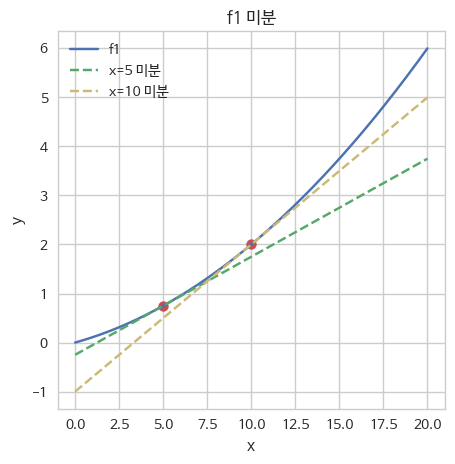

In [181]:
xx = np.linspace(0.0, 20.0, 1000)
yy = f1(xx)
plt.figure(figsize=(5, 5), dpi=100)
plt.title('f1 미분')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xx, yy, label='f1')
plt.scatter([5, 10], [f1(5), f1(10)], s=50, c='r')
b1 = f1(5) - numerical_diff(f1, 5)*5
plt.plot([0, 5, 20], [(numerical_diff(f1, 5)*0 + b1), f1(5), (numerical_diff(f1, 5)*20 + b1)], \
         'g--', label='x=5 미분')
b2 = f1(10) - numerical_diff(f1, 10)*10
plt.plot([0, 10, 20], [(numerical_diff(f1, 10)*0 + b2), f1(10), (numerical_diff(f1, 10)*20 + b2)], \
         'y--', label='x=10 미분')
plt.legend()
plt.show()

In [74]:
def f2(x):
    return x[0]**2 + x[1]**2

In [190]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)  # f(x + h)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)  # f(x - h)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val #원래 값 복원
    return grad 

In [191]:
numerical_gradient(f2, np.array([3., 4.]))

array([ 6.,  8.])

수치 미분 최종

In [ ]:
def numerical_gradient(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)

    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)  # f(x+h)

        x[idx] = tmp_val - h
        fxh2 = f(x)  # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2 * h)

        x[idx] = tmp_val  # 값 복원
        it.iternext()

    return grad

np.nditer

In [90]:
a = np.arange(0,60,5)
a = a.reshape(3,4)
a

array([[ 0,  5, 10, 15],
       [20, 25, 30, 35],
       [40, 45, 50, 55]])

In [73]:
a = a.reshape(2, 2, 3)
a

array([[[ 0,  5, 10],
        [15, 20, 25]],

       [[30, 35, 40],
        [45, 50, 55]]])

In [91]:
x = np.nditer(a, flags=['multi_index'])

In [92]:
x.iternext()

True

In [93]:
x.multi_index

(0, 1)

### 경사 하강법 Gradient Descent

코드는 ML/GD/GD_common.py 참조

In [4]:
%pwd

'/Users/Soo/code/gitproject/ML/NeuralNetwork'

In [1]:
def f2(x):
    return x[0]**2 + x[1]**2

In [2]:
def f22(x):
    return x[:, :, 0]**2 + x[:, :, 1]**2

In [3]:
import os
import sys
sys.path.insert(0, '../GD/')
from GD_common import numerical_gradient, batch_gradient_descent

In [4]:
x_init = np.array([4., 5.])

In [5]:
grad, history_ = batch_gradient_descent(f2, x_init, alpha=0.1)

46


In [23]:
history_['x']

[array([[ 3.2,  4. ]]),
 array([[ 2.56,  3.2 ]]),
 array([[ 2.048,  2.56 ]]),
 array([[ 1.6384,  2.048 ]]),
 array([[ 1.31072,  1.6384 ]]),
 array([[ 1.048576,  1.31072 ]]),
 array([[ 0.8388608,  1.048576 ]]),
 array([[ 0.67108864,  0.8388608 ]]),
 array([[ 0.53687091,  0.67108864]]),
 array([[ 0.42949673,  0.53687091]]),
 array([[ 0.34359738,  0.42949673]]),
 array([[ 0.27487791,  0.34359738]]),
 array([[ 0.21990233,  0.27487791]]),
 array([[ 0.17592186,  0.21990233]]),
 array([[ 0.14073749,  0.17592186]]),
 array([[ 0.11258999,  0.14073749]]),
 array([[ 0.09007199,  0.11258999]]),
 array([[ 0.07205759,  0.09007199]]),
 array([[ 0.05764608,  0.07205759]]),
 array([[ 0.04611686,  0.05764608]]),
 array([[ 0.03689349,  0.04611686]]),
 array([[ 0.02951479,  0.03689349]]),
 array([[ 0.02361183,  0.02951479]]),
 array([[ 0.01888947,  0.02361183]]),
 array([[ 0.01511157,  0.01888947]]),
 array([[ 0.01208926,  0.01511157]]),
 array([[ 0.00967141,  0.01208926]]),
 array([[ 0.00773713,  0.00967

In [6]:
point_list = [[], []]
for point in history_['x']:
    x = point[0]
    y = point[1]
    point_list[0].append(x)
    point_list[1].append(y)

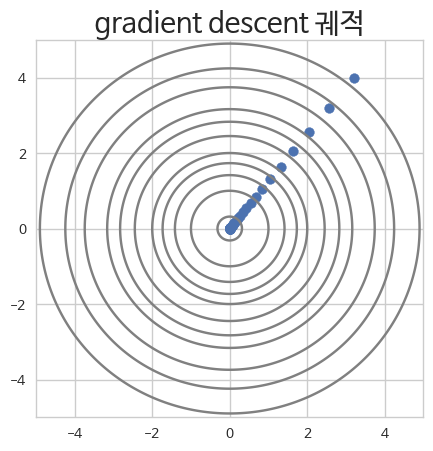

In [7]:
xx = np.linspace(-5, 5, 600)
X, Y = np.meshgrid(xx, xx)
data = np.dstack((X, Y))
Z = f22(data)
levels = [0.1, 1, 2, 3, 4, 6, 8, 10, 14, 18, 24]
plt.figure(figsize=(5, 5), dpi=100)
plt.contour(X, Y, Z, colors="gray", levels=levels)
plt.scatter(point_list[0], point_list[1])
plt.title('gradient descent 궤적', fontsize=20)
plt.show()

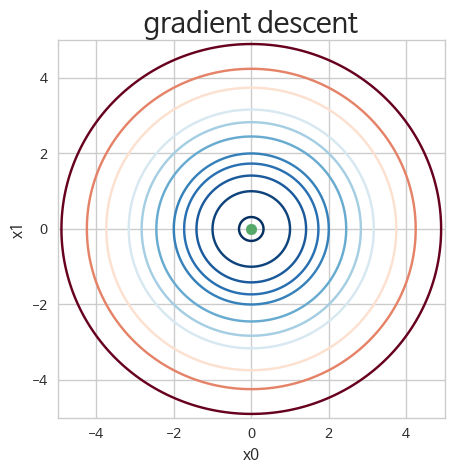

In [20]:
from matplotlib import animation, rc
import matplotlib.pylab as plt
rc('animation', html='html5')

xx = np.linspace(-5, 5, 600)
X, Y = np.meshgrid(xx, xx)
data = np.dstack((X, Y))
Z = f22(data)
levels = [0.1, 1, 2, 3, 4, 6, 8, 10, 14, 18, 24]
fig = plt.figure(figsize=(5, 5), dpi=100)
ax = fig.add_subplot(1, 1, 1)
scat = ax.scatter([], [], s=60, c='g')

def ani_init():
    scat.set_offsets([])
    return scat,

def ani_update(i):
    scat.set_offsets(history_['x'][i])
    return scat,

plt.contour(X, Y, Z, cmap='RdBu_r', levels=levels)
plt.title('gradient descent', fontsize=20)
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.xlabel('x0')
plt.ylabel('x1')
anim = animation.FuncAnimation(fig, ani_update, init_func=ani_init,
                               frames=history_['epoch'][-1]+1, interval=100, blit=True)

anim

In [21]:
anim.save('./figs/GDanimation.gif', writer='imagemagick', fps=100)